## Suraj Sawant

## TASK 1 - Prediction Using Supervised Machine Learning
## The Spark Foundation

To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data

- What will be predicted score if a student study for 9.25 hrs in a day?



## Importing libraries


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

## Importing the data

In [3]:
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the data

In [7]:
dataset.shape

(25, 2)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Let's plot our data points on to a 2-D graph and see whether we can find any relationship between the data.

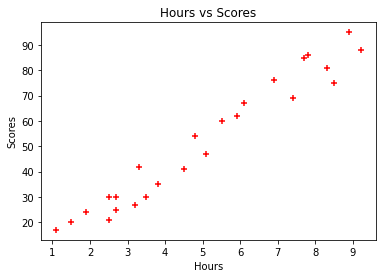

In [4]:
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(dataset.Hours, dataset.Scores, color='red', marker='+')


The above graph shows that there is a positive linear relationship between hours studied on x-axis and score % in y-axis


##  Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##  Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


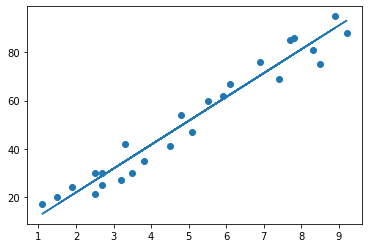

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()




## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.


In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### What will be predicted score if a student studies for 9.25 hrs/ day?


In [14]:
# You can also test with your own data
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538



## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [15]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2_score Error:',r2_score(y_test, y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
r2_score Error: 0.9454906892105356
Mean Squared Error:  21.5987693072174
